In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint


from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn import model_selection,preprocessing
from sklearn import metrics
from sklearn.model_selection import cross_val_predict


%matplotlib inline

2023-03-17 01:47:48.348462: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Exercise 1 (1 point):

In [2]:
Zjets = pd.read_csv("Zjets.csv",index_col=0)

In [3]:
Diboson = pd.read_csv("Diboson.csv",index_col=0)

In [4]:
Top = pd.read_csv("Top.csv",index_col=0)

In [5]:
ggH1000 = pd.read_csv("ggH1000.csv",index_col=0)

### Data sanity check

In [6]:
Zjets.head(5)

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,-0.790471,177227.420,1,95697.766,64252.690,0.097862,1.895164,425871.88,-1.329446,-0.485957,...,1.782276,-1.057460,76128.370,12476.566,1,-0.289019,1.966965,11973.011,596020.44,-1.0
1,0.789204,10660.757,1,90289.914,32506.705,0.000000,0.000000,247948.36,-0.429050,2.770810,...,-0.918399,-1.229385,40799.945,38147.754,1,0.847265,0.995251,27624.867,260357.19,-1.0
2,-0.872639,655334.400,1,92994.430,55287.625,0.059006,2.463149,630492.94,-0.543789,-2.190247,...,-1.091297,0.865696,57988.660,29768.775,1,0.440004,-1.042492,27102.590,422698.44,-1.0
3,-0.772697,41489.973,1,89607.580,63405.484,0.265080,2.081222,610611.56,1.776149,-0.214862,...,1.238367,2.127853,55424.742,69817.470,1,0.809497,-2.276664,51873.030,302718.06,-1.0
4,1.581337,41731.630,1,90199.480,47187.332,0.093765,2.321676,781746.90,-1.524169,-1.101946,...,-0.116431,1.745413,68312.220,33509.810,1,0.598434,-1.972788,28290.979,461896.25,-1.0


In [7]:
Diboson.head(5)

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,0.387345,41920.540,0,187549.810,374316.600,0.127114,1.786927,353161.47,-0.001591,1.914456,...,1.677279,-1.346853,369495.34,12147.315,1,-0.686657,-2.412152,9755.2705,1014320.10,-1.0
1,0.172328,225618.530,0,13106.807,51429.535,0.269517,2.296220,357617.66,-1.066937,-0.145452,...,-2.057147,2.975854,36972.74,34980.440,-1,-1.521354,2.819377,14584.7360,240295.97,-1.0
2,0.371392,42284.125,0,84519.230,153790.270,0.051175,3.360730,345472.30,0.704825,-2.816466,...,-0.285897,-0.084159,146895.95,24618.990,-1,0.741342,1.177780,19119.7030,471285.40,-1.0
3,0.309902,42735.938,1,76138.640,102611.836,0.117028,0.702838,476446.80,0.095546,1.012053,...,-0.160614,-2.544057,109699.72,22303.861,1,-1.648011,1.120479,8277.4480,495503.10,-1.0
4,0.202772,70475.780,0,86138.000,141886.280,0.053951,3.634348,799487.75,-1.828396,-2.406883,...,-0.499056,0.429884,151453.40,14053.401,-1,-0.171763,2.796952,13848.2230,498823.40,-1.0


In [8]:
Top.head(5)

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,2.004522e-09,51609.760,1,35253.492,35612.324,0.109581,1.435712,461309.30,-1.195378,2.909157,...,0.164823,1.042927,38513.980,11072.072,1,-0.665443,-0.969063,9003.888,245723.92,-1.0
1,1.822626e-09,225038.800,1,20311.205,38644.793,0.090346,2.403266,276659.70,0.387434,3.050592,...,-1.871251,0.601309,34191.734,34626.312,1,-1.975266,1.798074,9425.637,351938.88,-1.0
2,1.552981e-09,27090.697,1,134715.500,244261.840,0.212569,1.336584,900965.50,-1.822714,-0.619062,...,0.701193,2.446600,254871.310,17551.730,-1,-0.196344,0.185058,17218.764,1046120.90,-1.0
3,1.660535e-09,57572.890,0,69086.836,90045.625,0.133918,1.780693,596016.20,-1.725750,-2.554189,...,-2.305750,0.627527,84608.050,10652.912,1,-0.413642,1.657720,9801.820,301995.70,-1.0
4,1.461494e-09,123177.900,0,51731.508,52780.684,0.101556,3.398984,590811.44,1.477704,1.432744,...,-0.685020,-2.360906,50720.953,15453.791,-1,0.880629,2.436030,10932.975,376986.28,-1.0


In [9]:
ggH1000.head(5)

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,0.013603,44495.770,1,87475.55,627990.80,0.116438,0.889354,675246.25,-0.851387,2.042860,...,-0.906080,-1.876361,320104.62,495510.120,-1,-1.034808,-1.631069,312638.44,1063465.80,999999.56
1,0.242178,34441.156,1,90507.31,409780.94,0.191874,1.485706,604275.70,1.041311,-0.817613,...,2.363212,2.032987,288589.78,579769.560,1,2.178999,2.466579,129548.62,974210.75,1000003.60
2,0.096412,21625.379,0,89765.85,344668.30,0.122089,1.219367,612517.94,0.417858,-2.133300,...,1.217848,0.664946,228625.23,333899.970,-1,1.695172,0.920596,118590.28,996837.40,999999.80
3,0.096373,21855.973,1,92313.63,535629.06,0.061306,0.592705,482630.90,0.438590,2.701475,...,-0.045790,-0.626280,302502.84,243535.750,1,0.293053,-0.557273,233439.89,989655.56,1000008.80
4,0.073052,33677.380,1,89451.92,296257.47,0.159334,0.724910,459737.80,1.213717,-0.926707,...,-1.289961,2.238501,224785.02,98477.516,-1,-0.747040,2.647597,76205.98,993398.30,1000011.90


All data well loaded

### Check need for data cleaning

In [10]:
np.isnan(Zjets).sum().sum()

0

In [11]:
np.isnan(Diboson).sum().sum()

0

In [12]:
np.isnan(Top).sum().sum()

0

In [13]:
np.isnan(ggH1000).sum().sum()

0

Data is clean

### Plot 1D distributions for the first 9 variables listed in Table 1, with one plot per variable and the distributions categorised by physics process

In [14]:
var_names = ["lep1_pt","lep2_pt","fatjet_pt","fatjet_eta","fatjet_D2","Zll_mass","Zll_pt","MET","reco_zv_mass"]

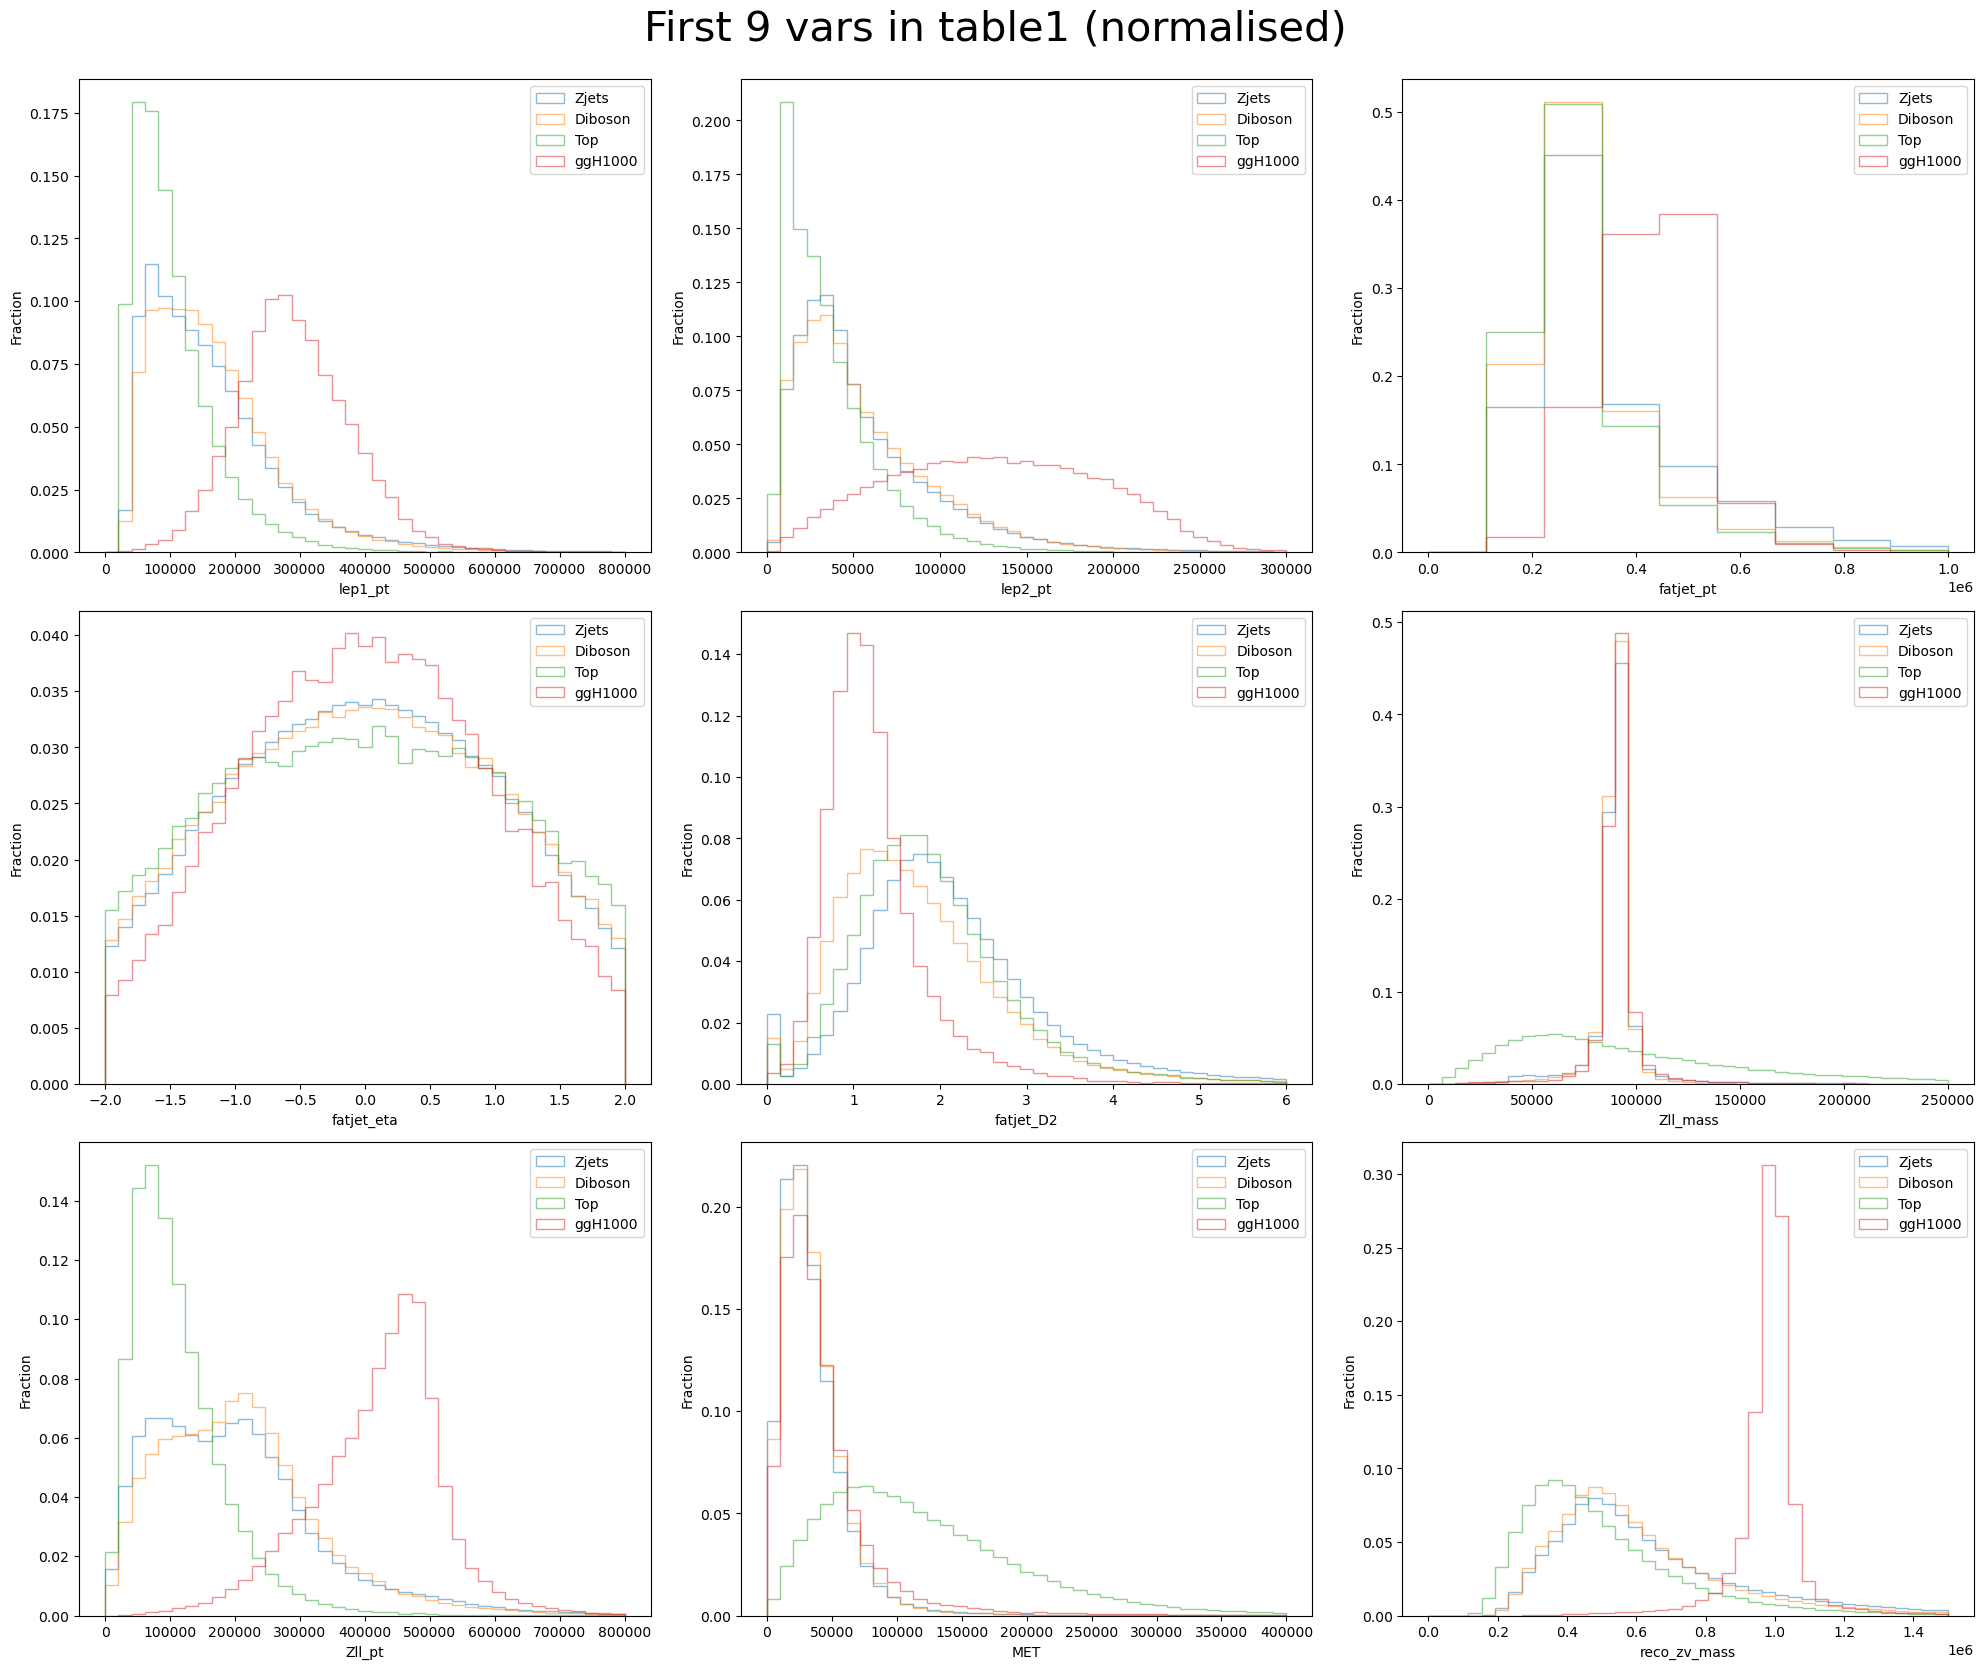

In [15]:
plt.figure(figsize=(20,80))

bins = [np.linspace(0,0.8e6,40),np.linspace(0,0.3e6,40),np.linspace(0,1e6,10),np.linspace(-2,2,40),
        np.linspace(0,6,40),np.linspace(0,0.25e6,40),np.linspace(0,0.8e6,40),np.linspace(0,0.4e6,40),
        np.linspace(0,1.5e6,40)]

for i, var in enumerate(var_names):
    ax = plt.subplot(15,3,i+1)
    for j in [Zjets[var],Diboson[var],Top[var],ggH1000[var]]:
        non_zero = np.count_nonzero(~np.isnan(j))
        weights = np.ones_like(j)/float(non_zero)
        plt.hist(j,alpha=0.5,bins=bins[i],weights=weights,histtype="step")

    plt.xlabel(var)
    plt.ylabel("Fraction")
    plt.legend(["Zjets","Diboson","Top","ggH1000"])        
    
plt.suptitle("First 9 vars in table1 (normalised)",y=1,size=30)    
plt.tight_layout()
plt.show()

All variables provide a good level of separation between the Higgs signal and background events and are therefore useful for the classifier to improve its discrimination power by training on them.

## Exercise 2 (2 points)

### a)

In [16]:
random_seed = 1

In [17]:
background = pd.concat([Zjets,Diboson,Top],ignore_index=True)

In [18]:
background.head(5)

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,-0.790471,177227.420,1,95697.766,64252.690,0.097862,1.895164,425871.88,-1.329446,-0.485957,...,1.782276,-1.057460,76128.370,12476.566,1,-0.289019,1.966965,11973.011,596020.44,-1.0
1,0.789204,10660.757,1,90289.914,32506.705,0.000000,0.000000,247948.36,-0.429050,2.770810,...,-0.918399,-1.229385,40799.945,38147.754,1,0.847265,0.995251,27624.867,260357.19,-1.0
2,-0.872639,655334.400,1,92994.430,55287.625,0.059006,2.463149,630492.94,-0.543789,-2.190247,...,-1.091297,0.865696,57988.660,29768.775,1,0.440004,-1.042492,27102.590,422698.44,-1.0
3,-0.772697,41489.973,1,89607.580,63405.484,0.265080,2.081222,610611.56,1.776149,-0.214862,...,1.238367,2.127853,55424.742,69817.470,1,0.809497,-2.276664,51873.030,302718.06,-1.0
4,1.581337,41731.630,1,90199.480,47187.332,0.093765,2.321676,781746.90,-1.524169,-1.101946,...,-0.116431,1.745413,68312.220,33509.810,1,0.598434,-1.972788,28290.979,461896.25,-1.0


In [19]:
background = shuffle(background, random_state=random_seed)
background.reset_index(drop=True, inplace=True)

In [20]:
signal = ggH1000

In [21]:
n_signal = signal.shape[0]

In [22]:
# 50:50 training data split
training_data = pd.concat([signal,background[:n_signal]],ignore_index=True)
training_data = shuffle(training_data, random_state=random_seed)
training_data.reset_index(drop=True, inplace=True)

In [23]:
training_data

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,0.846983,22827.674,1,87324.480,395082.220,0.106153,1.895171,580697.90,1.010929,-0.987410,...,1.184833,1.749762,228240.810,232407.920,-1,0.830533,2.013982,170239.810,770587.94,-1.0
1,0.763047,30422.560,0,85723.086,107484.945,0.144974,2.267384,639947.56,-1.627519,0.834819,...,0.884812,-2.701951,72889.120,128148.930,-1,1.383289,-1.428691,60465.430,759062.50,-1.0
2,0.067073,38693.664,0,92824.600,515638.900,0.097164,0.949827,442687.28,0.437188,-2.953364,...,-0.312858,0.359559,321249.660,208711.730,1,-0.248653,0.719804,202421.690,971034.06,999999.2
3,-0.812856,76161.660,0,90846.516,210837.440,0.094007,2.403719,239233.97,0.102582,-0.349377,...,2.037646,2.638733,187892.360,176665.030,-1,2.126372,-2.569043,41550.320,707784.80,-1.0
4,0.067777,28144.002,1,92085.800,473327.030,0.018966,1.274933,438636.78,0.085130,2.312056,...,-0.583793,-0.846083,377572.340,119077.530,1,-0.522715,-1.309828,104476.484,966869.30,999999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100021,0.861098,19323.857,1,78208.740,94247.055,0.152209,1.393289,650673.30,-1.021939,0.461554,...,-1.644479,-3.046992,83195.130,112043.370,-1,-1.710780,1.730281,39217.150,436876.72,-1.0
100022,0.777777,159252.060,1,88197.550,88585.430,0.183168,1.140959,395787.40,1.160833,2.668340,...,-0.739448,0.260091,98142.710,54483.777,-1,-1.723455,2.447735,18845.006,511042.62,-1.0
100023,0.094302,31016.588,0,93739.945,368229.500,0.088239,2.256202,321748.70,0.016378,-0.230039,...,1.560996,-3.134791,278702.800,281457.440,1,1.687556,2.596319,100678.320,928582.80,1000004.7
100024,-0.791952,29054.264,1,95345.984,279702.470,0.070635,5.715883,656091.10,-1.726404,2.280387,...,-1.652514,-1.020464,227983.050,286038.970,1,-2.269160,-1.564611,58526.582,515138.00,-1.0


### b)

In [24]:
select_training = training_data[var_names[:-1]+["isSignal"]]

In [25]:
select_training

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,isSignal
0,228240.810,170239.810,372447.25,1.010929,1.895171,87324.480,395082.220,22827.674,0
1,72889.120,60465.430,241767.25,-1.627519,2.267384,85723.086,107484.945,30422.560,0
2,321249.660,202421.690,397424.78,0.437188,0.949827,92824.600,515638.900,38693.664,1
3,187892.360,41550.320,237300.92,0.102582,2.403719,90846.516,210837.440,76161.660,0
4,377572.340,104476.484,436885.88,0.085130,1.274933,92085.800,473327.030,28144.002,1
...,...,...,...,...,...,...,...,...,...
100021,83195.130,39217.150,412134.00,-1.021939,1.393289,78208.740,94247.055,19323.857,0
100022,98142.710,18845.006,224801.53,1.160833,1.140959,88197.550,88585.430,159252.060,0
100023,278702.800,100678.320,320630.72,0.016378,2.256202,93739.945,368229.500,31016.588,1
100024,227983.050,58526.582,226273.50,-1.726404,5.715883,95345.984,279702.470,29054.264,0


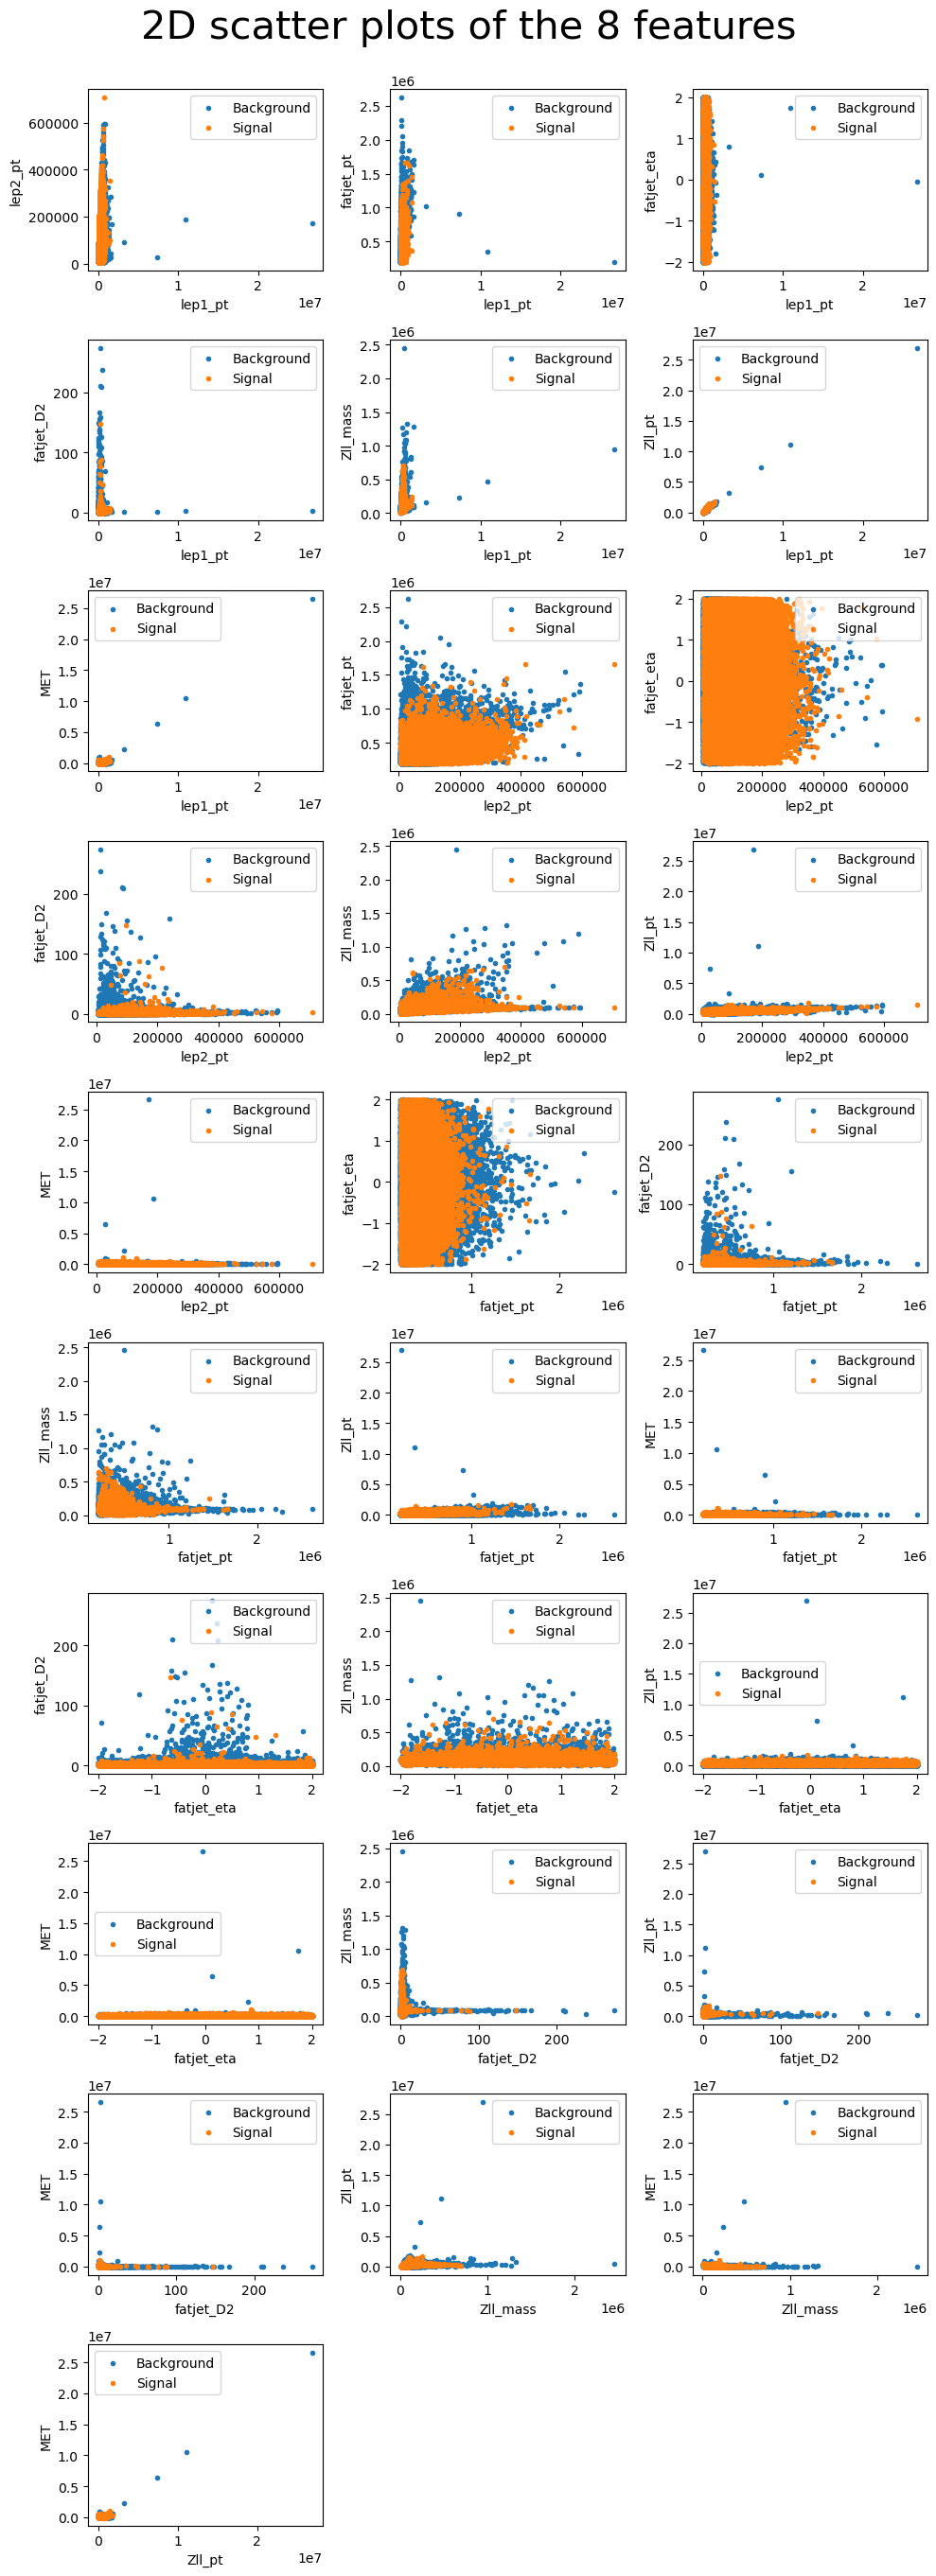

In [26]:
plt.figure(figsize=(10,40))
count = 1
features = select_training.columns[:-1]
for i, var1 in enumerate(features[:-1]):
    for j,var2 in enumerate(features[i+1:]):
        ax = plt.subplot(15,3,count)
        count +=1
        for signal in [0,1]:
            mask = select_training.isSignal == signal
            plt.scatter(select_training[var1][mask],select_training[var2][mask], marker=".")
        
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.legend(["Background","Signal"])        
    
plt.suptitle("2D scatter plots of the 8 features",y=1,size=30)    
plt.tight_layout()
plt.show()

Most of the plots show some sort of correlation between the variables, so this suggests that a deeper network would perform better as it can learn these correlations to provide better discriminating power.

## Exercise 3 (1 point)

In [27]:
features = select_training[select_training.columns[:-1]]
target = select_training.isSignal

In [28]:
sc = preprocessing.StandardScaler()
features = sc.fit_transform(features)
# set random seed
Answer_to_all_questions = 42
# train - test split of dataset
x_train, x_test, y_train, y_test = model_selection.train_test_split(features, target, test_size=0.3,
                                                                    random_state = Answer_to_all_questions)
print (x_train.shape, x_test.shape, y_train.shape,y_test.shape)

(70018, 8) (30008, 8) (70018,) (30008,)


## Exercise 4 (3 points)

In [29]:
def my_model(num_inputs, num_nodes, extra_depth,drop_out):
    # create model
    model = Sequential()
    model.add(Dense(num_nodes, input_dim=num_inputs, kernel_initializer="normal", activation="relu"))
    model.add(Dropout(drop_out))
    for i in range (extra_depth):
    # code up the extra layers here
        model.add(Dense(num_nodes, kernel_initializer="normal", activation="relu"))
        model.add(Dropout(drop_out))
    model.add(Dense(1, activation="sigmoid"))
    # Compile model
    model.compile(loss="binary_crossentropy",optimizer="adam", metrics =["accuracy"])
    return model

In [30]:
num_nodes = 20
extra_depth=1
drop_out=0.2
model = my_model(x_train.shape[1],num_nodes,extra_depth,drop_out)

2023-03-17 01:49:51.140973: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
batchSize = 500
N_epochs = 50

In [32]:
history = model.fit(x_train,y_train,batch_size=batchSize,epochs=N_epochs,verbose=1,
                    validation_data=(x_test,y_test))

Epoch 1/50
141/141 [==============================] - 1s 5ms/step - loss: 0.4883 - accuracy: 0.8471 - val_loss: 0.3268 - val_accuracy: 0.8739
Epoch 2/50
141/141 [==============================] - 0s 4ms/step - loss: 0.3274 - accuracy: 0.8750 - val_loss: 0.2896 - val_accuracy: 0.8862
Epoch 3/50
141/141 [==============================] - 1s 4ms/step - loss: 0.3081 - accuracy: 0.8810 - val_loss: 0.2821 - val_accuracy: 0.8881
Epoch 4/50
141/141 [==============================] - 1s 4ms/step - loss: 0.3049 - accuracy: 0.8811 - val_loss: 0.2798 - val_accuracy: 0.8886
Epoch 5/50
141/141 [==============================] - 1s 4ms/step - loss: 0.3021 - accuracy: 0.8823 - val_loss: 0.2783 - val_accuracy: 0.8890
Epoch 6/50
141/141 [==============================] - 0s 4ms/step - loss: 0.3002 - accuracy: 0.8835 - val_loss: 0.2770 - val_accuracy: 0.8907
Epoch 7/50
141/141 [==============================] - 1s 4ms/step - loss: 0.2992 - accuracy: 0.8827 - val_loss: 0.2755 - val_accuracy: 0.8909
Epoch 

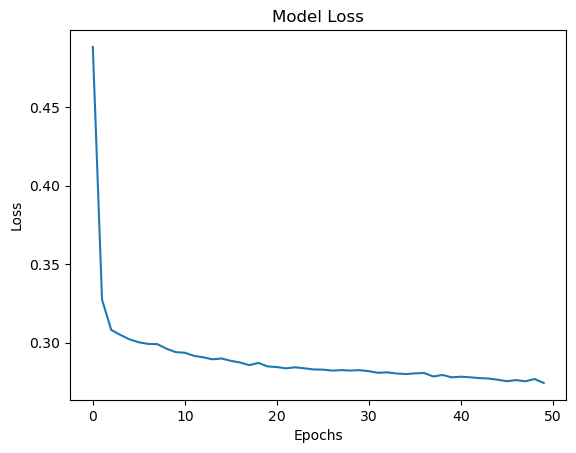

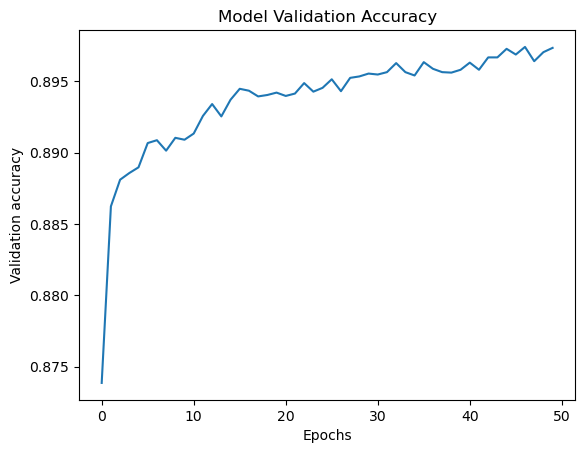

In [33]:
plt.plot(history.history["loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()


plt.plot(history.history["val_accuracy"])
plt.title("Model Validation Accuracy")
plt.ylabel("Validation accuracy")
plt.xlabel("Epochs")
plt.show()

Loss curve continues to smoothly decrease, indicating constant improvment in performance

Validation accuracy continuously increasing, no sign of over-training

## Exercise 5 (2 points)

In [34]:
callbacks_ = [
# if we don ’t have an increase of the accuracy for 10 epochs , terminate training.
EarlyStopping(verbose = True, patience=10, monitor = "val_accuracy") ,
# Always make sure that we ’ re saving the model weights with the best accuracy .
ModelCheckpoint("model.h5", monitor = "val_accuracy" , save_best_only = True, mode = "max")]

In [35]:
select_training = training_data[var_names+["isSignal"]] # add the reco_zv_mass variable in the training

In [36]:
features = select_training[select_training.columns[:-1]]
target = select_training.isSignal

sc = preprocessing.StandardScaler()
features = sc.fit_transform(features)
# set random seed
Answer_to_all_questions = 42
# train - test split of dataset
x_train, x_test, y_train, y_test = model_selection.train_test_split(features, target, test_size=0.3,
                                                                    random_state = Answer_to_all_questions)
print (x_train.shape, x_test.shape, y_train.shape,y_test.shape)

(70018, 9) (30008, 9) (70018,) (30008,)


In [53]:
num_nodes = 300
extra_depth= 3
drop_out=0.25

model = my_model(x_train.shape[1],num_nodes,extra_depth,drop_out)

batchSize = 200
N_epochs = 50

In [54]:
history = model.fit(x_train, y_train, batch_size = batchSize, epochs = N_epochs , \
verbose =1, validation_data =(x_test, y_test), callbacks = callbacks_)

Epoch 1/50
351/351 [==============================] - 12s 32ms/step - loss: 0.2127 - accuracy: 0.9251 - val_loss: 0.1700 - val_accuracy: 0.9416
Epoch 2/50
351/351 [==============================] - 11s 31ms/step - loss: 0.1732 - accuracy: 0.9389 - val_loss: 0.1671 - val_accuracy: 0.9413
Epoch 3/50
351/351 [==============================] - 11s 31ms/step - loss: 0.1681 - accuracy: 0.9406 - val_loss: 0.1586 - val_accuracy: 0.9442
Epoch 4/50
351/351 [==============================] - 11s 31ms/step - loss: 0.1639 - accuracy: 0.9415 - val_loss: 0.1593 - val_accuracy: 0.9442
Epoch 5/50
351/351 [==============================] - 11s 30ms/step - loss: 0.1615 - accuracy: 0.9421 - val_loss: 0.1530 - val_accuracy: 0.9455
Epoch 6/50
351/351 [==============================] - 13s 37ms/step - loss: 0.1596 - accuracy: 0.9425 - val_loss: 0.1513 - val_accuracy: 0.9461
Epoch 7/50
351/351 [==============================] - 13s 38ms/step - loss: 0.1577 - accuracy: 0.9435 - val_loss: 0.1516 - val_accuracy:

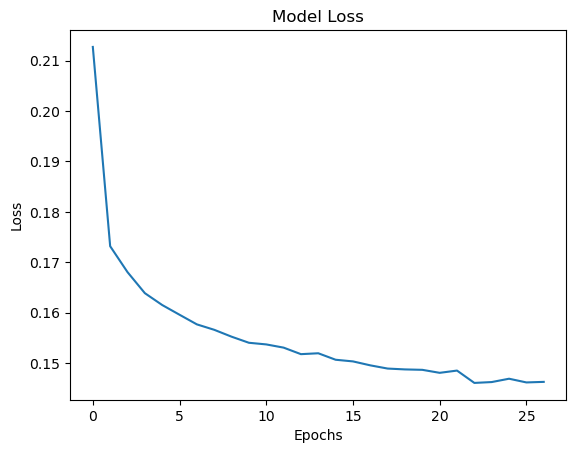

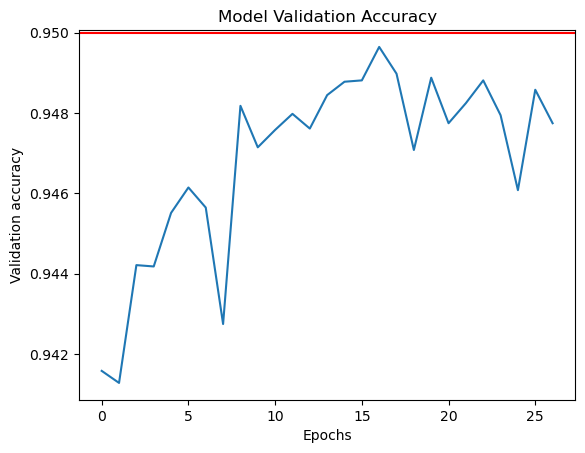

In [55]:
plt.plot(history.history["loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()


plt.plot(history.history["val_accuracy"])
plt.title("Model Validation Accuracy")
plt.axhline(y=0.95, color='r', linestyle='-')
plt.ylabel("Validation accuracy")
plt.xlabel("Epochs")
plt.show()

Best model achieves 94.96 validation accuracy

## Exercise 6 (1 point)

In [56]:
score = model.predict(x_test)

938/938 [==============================] - 2s 2ms/step


In [57]:
prediction = score>0.5

In [58]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


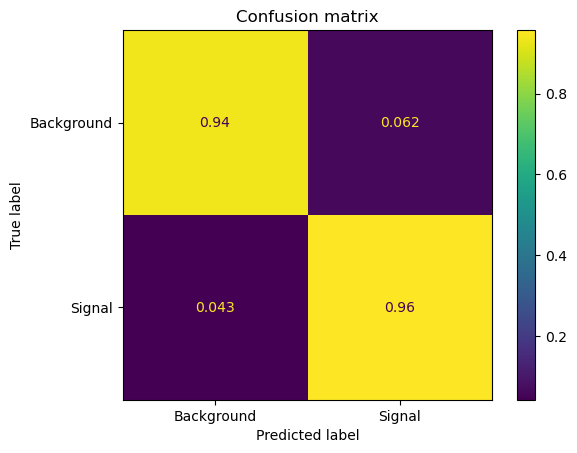

In [59]:
cm = confusion_matrix(y_test,prediction,normalize="true")

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Background","Signal"])

disp.plot()
plt.title("Confusion matrix")
plt.show()

In [60]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, score)

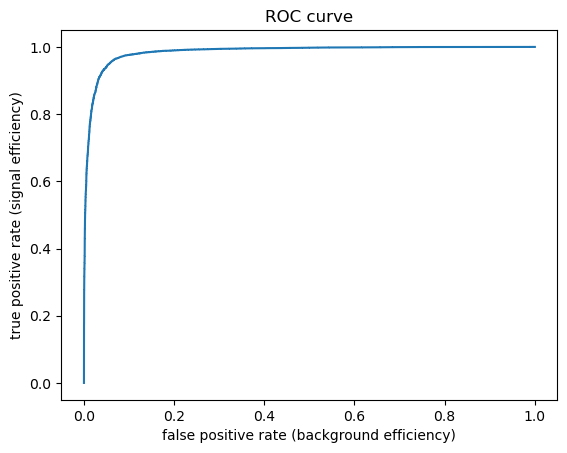

In [61]:
plt.plot(fpr,tpr)
plt.title("ROC curve")
plt.xlabel("false positive rate (background efficiency)")
plt.ylabel("true positive rate (signal efficiency)")
plt.show()

Value of the ROC curve closest to the point [0,1] is the optimal performance point (point highest on the left)

This is because we want the signal efficiency to be as high as possible and the background efficiency to be as low as possible.